# **Install And Import Package**

In [ ]:
# install gazpacho package
!pip install gazpacho

In [ ]:
# import package

# package of web scraping & api
from gazpacho import Soup
from requests import get

# package of regular expression
import re

# package of sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# package of pandas and numpy
import pandas as pd
import numpy as np

# **Web Scraping And Create dataset to data frame**

In [ ]:
# website: Livinginsider
# searching: condo in Rama9 area
url = "https://www.livinginsider.com/searchword_en/Condo/Buysell/1/rama9.html"
response = get(url)
data = Soup(response.text)

In [ ]:
## price data
raw_price = data.find("div",{"class" : "t-16"})
price = [float(raws.strip().replace("฿","").replace(",","")) for raws in raw_price]

In [ ]:
## room_size data
raw_size = data.find("div",{"class" : "col-xs-6 ic-detail col-md-offset-1 col-sm-offset-1 col-md-5 col-sm-5  "})

size = []

for s in raw_size :
    text = ' Sq.m.'
    ss = float(s.strip().replace(text,""))
    size.append(ss)

In [ ]:
## floor data

## Seperate data to 3 levels : Low = 0-10, Medium = 11-20, High = More than 21
raw_floor = data.find("div",{"class" : "col-md-5 col-sm-5 col-xs-6 ic-detail  "})

low_flr = []
med_flr = []
high_flr = []

for f in raw_floor :
    ff = f.strip().replace("Level ","")
    ff = int(re.sub("\.*-[0-9]+","",ff))

    if ff < 10 :
        low_flr.append(1)
    else :
        low_flr.append(0)

    if ff <20 :
       med_flr.append(1)
    else :
        med_flr.append(0)

    if ff > 21 :
       high_flr.append(1)
    else :
        high_flr.append(0)

In [ ]:
## bed data
raw_bed = data.find("div",{"class" : "col-xs-6 ic-detail col-md-5 col-sm-5  col-sm-offset-1 col-md-offset-1  "})

bed = []
type_room = []
type_studio = []

for a in raw_bed :
    x = a.strip()
    if x == "Studio room" :
        type_studio.append(1)
    else :
        type_studio.append(0)

    if x == "Studio room" :
        type_room.append(0)
    else :
        type_room.append(1)

for b in raw_bed :
    text = " Beds"
    x = int(b.strip().replace(text,"").replace("Studio room","1"))
    bed.append(x)

In [ ]:
## bath data
raw_bath = data.find("div",{"class" : "col-xs-6 ic-detail col-md-5 col-sm-5   "})

bath = []

for a in raw_bath :
    text = " Bath"
    x = int(a.strip().replace(text,""))
    bath.append(x)

In [ ]:
## combind all list into dataframe
df = pd.DataFrame({
    "price" : price,
    "size" : size,
    "low_floor" : low_flr,
    "medium_floor" : med_flr,
    "high_floor" : high_flr,
    "bed" : bed,
    "bath" : bath,
    "studio_type" : type_studio,
    "room_type" : type_room
})

# recheck data type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         48 non-null     float64
 1   size          48 non-null     float64
 2   low_floor     48 non-null     int64  
 3   medium_floor  48 non-null     int64  
 4   high_floor    48 non-null     int64  
 5   bed           48 non-null     int64  
 6   bath          48 non-null     int64  
 7   studio_type   48 non-null     int64  
 8   room_type     48 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 3.5 KB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'low_floor'}>],
       [<Axes: title={'center': 'medium_floor'}>,
        <Axes: title={'center': 'high_floor'}>,
        <Axes: title={'center': 'bed'}>],
       [<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'studio_type'}>,
        <Axes: title={'center': 'room_type'}>]], dtype=object)

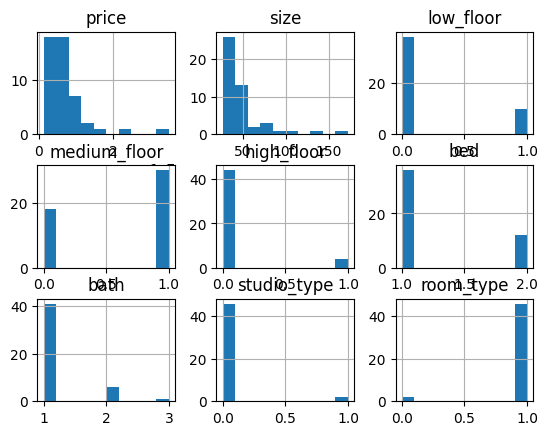

In [ ]:
df.hist()

In [ ]:
## take log to price data for making log transformation because data has the right skweness
df["log_price"] = np.log(df["price"])
df["log_size"] = np.log(df["size"])

df

,price,size,low_floor,medium_floor,high_floor,bed,bath,studio_type,room_type,log_price,log_size
0,35000000.0,135.00,0,0,0,1,1,0,1,17.370859,4.905275
1,4118000.0,32.00,1,1,0,1,1,0,1,15.230878,3.465736
2,3490000.0,28.00,0,1,0,1,1,0,1,15.065412,3.332205
3,5100000.0,37.00,0,0,0,1,1,0,1,15.444751,3.610918
4,6190000.0,46.00,0,1,0,1,1,0,1,15.638446,3.828641
5,5190000.0,37.00,0,0,0,1,1,0,1,15.462244,3.610918
6,3490000.0,27.00,0,1,0,1,1,0,1,15.065412,3.295837
7,3390000.0,30.00,0,1,0,1,1,0,1,15.036340,3.401197
8,6600000.0,47.00,0,0,0,2,1,0,1,15.702580,3.850148
9,3390000.0,30.50,0,1,0,1,1,0,1,15.036340,3.417727


# **1. Prapare Data / Clean Data**

In [ ]:
# create X, y variables
X = df[["log_size","low_floor","medium_floor","high_floor","bed","bath","studio_type","room_type"]]
y = df["log_price"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# **2. Train Model**
# **3. Test Model / Scoring**
# **4. Evaluate**
## Sepearate by Linear Regression, Decision Tree, and Random Forest

In [ ]:
# create function for predict model
def pred(X_test,model) :
    pred = model.predict(X_test)
    return pred

In [ ]:
# create function for evaluate model
def evaluate_model(y_test,pred,model) :
    MAE = (np.mean(np.absolute((y_test-pred)))).round(4)
    MSE = (np.mean((y_test-pred)**2)).round(4)
    RMSE = (np.sqrt(MSE)).round(4)
    return {"R-Square" : (model.score(X, y)).round(4),
            "MAE" : MAE,
            "MSE" : MSE,
            "RMSE" : RMSE,}

### 1. Linear Regression

In [ ]:
# train model
l_model = LinearRegression().fit(X_train,y_train)

# test model / scoring
l_pred = pred(X_test,l_model)

# evaluate
l_evaluate = evaluate_model(y_test,l_pred,l_model)

print(l_evaluate)

{'R-Square': 0.6725, 'MAE': 0.2948, 'MSE': 0.1833, 'RMSE': 0.4281}


###2. Decision Tree

In [ ]:
# train model
d_model = DecisionTreeRegressor(random_state=55).fit(X_train,y_train)

# test model / scoring
d_pred = pred(X_test,d_model)

# evaluate
d_evaluate = evaluate_model(y_test,d_pred,d_model)

print(d_evaluate)

{'R-Square': 0.7019, 'MAE': 0.3972, 'MSE': 0.3039, 'RMSE': 0.5513}


### 3. Random Forests

In [ ]:
# train model
r_model = RandomForestRegressor(random_state=55).fit(X_train,y_train)

# test model / scoring
r_pred = pred(X_test,r_model)

# evaluate
r_evaluate = evaluate_model(y_test,r_pred,r_model)

print(r_evaluate)

{'R-Square': 0.7303, 'MAE': 0.2775, 'MSE': 0.1979, 'RMSE': 0.4449}


# **Summary Models**

In [ ]:
# combine evaluate of each models in list
evaluate_list = [l_evaluate,d_evaluate,r_evaluate]

# create dataframe
summary_model = (pd.DataFrame(evaluate_list,index=["LinearRegression","DecisionTree","RandomForest"])).sort_values("R-Square",ascending=False).sort_values("MAE")

print(summary_model)

                  R-Square     MAE     MSE    RMSE
RandomForest        0.7303  0.2775  0.1979  0.4449
LinearRegression    0.6725  0.2948  0.1833  0.4281
DecisionTree        0.7019  0.3972  0.3039  0.5513


#### **Result:**
As the summary model table,
I found that **Random Forest model is the most suitable for prediction this dataset** more than Decision Tree and Linear Regression because it has the high R-Square even if not the highest but the different point is small and also has the lowest MAE, MSE, and RMSE.